## Ejercicio 3.1 K-NN

Construimos el dataset ficticio


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
N=100

mu_A = 15
sigma_A = 5

mu_B = 8
sigma_B = 2

A = np.random.normal(mu_A,sigma_A,N)
B = np.random.normal(mu_B,sigma_B,N)

data = np.concatenate((A,B))
labels = np.array(['A']*N+['B']*N)




Primero armamos como pide la consigna: 50% train y 50% para validar, con k=10

In [ ]:
from sklearn.model_selection import train_test_split

data_train,data_test,labels_train,labels_test = train_test_split(data,labels,stratify=labels,test_size=0.5,random_state=42)

In [ ]:
print('TRAIN',data_train.shape,labels_train.shape)
print('TEST',data_test.shape,labels_test.shape)


TRAIN (100,) (100,)
TEST (100,) (100,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(data_train.reshape(-1, 1),labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, roc_auc_score
preds = knn.predict(data_test.reshape(-1,1))
preds.shape

(100,)

AUC: 0.820
Positive label: A
True negatives:48
True positives:34
False negatives:16
False positives:2

Sensitivity(recall):0.68
Specificity:0.96
PPV(precision):0.94
NPV:0.75

f1-score:0.791
accuracy:0.820


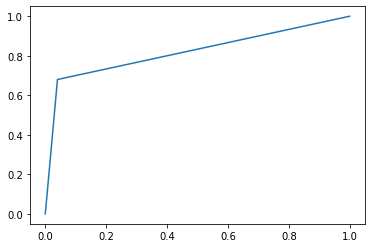

In [ ]:
labels_test_num = [0 if l=='B' else 1 for l in labels_test]
preds_num = [0 if p=='B' else 1 for p in preds]

fpr,tpr,th = roc_curve(labels_test_num,preds_num)
print('AUC: {:.3f}'.format(roc_auc_score(labels_test_num,preds_num)))
plt.plot(fpr,tpr)
tn, fp, fn, tp = confusion_matrix(labels_test_num,preds_num).ravel()
  
sens = tp/(tp+fn)
spec = tn/(tn+fp)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
print('Positive label: A')
print(f'True negatives:{tn}\nTrue positives:{tp}\nFalse negatives:{fn}\nFalse positives:{fp}')
print(f'\nSensitivity(recall):{sens:.2f}\nSpecificity:{spec:.2f}')
print(f'PPV(precision):{ppv:.2f}\nNPV:{npv:.2f}\n')
print('f1-score:{:.3f}'.format(2*ppv*sens/(ppv+sens)))
print('accuracy:{:.3f}'.format((tp+tn)/(tn+fp+fn+tp)))


## Probar variando N de train y k

In [ ]:
def getMetrics(preds,labels_test,print_results=True):
  labels_test_num = [0 if l=='B' else 1 for l in labels_test]
  preds_num = [0 if p=='B' else 1 for p in preds]
  fpr,tpr,th = roc_curve(labels_test_num,preds_num)
  print('AUC: {:.3f}'.format(roc_auc_score(labels_test_num,preds_num)))
  
  tn, fp, fn, tp = confusion_matrix(labels_test_num,preds_num).ravel()
  
  sens = tp/(tp+fn)
  spec = tn/(tn+fp)
  ppv = tp/(tp+fp)
  npv = tn/(tn+fn)
  acc = (tp+tn)/(tn+fp+fn+tp)
  if print_results:
    print(f'True negatives:{tn}\nTrue positives:{tp}\nFalse negatives:{fn}\nFalse positives:{fp}')
    print(f'\nSensitivity(recall):{sens:.2f}\nSpecificity:{spec:.2f}')
    print(f'PPV(precision):{ppv:.2f}\nNPV:{npv:.2f}\n')

    print('f1-score:{:.3f}'.format(2*ppv*sens/(ppv+sens)))
    print('accuracy:{:.3f}'.format(acc))
  else:
    return tn, fp, fn, tp, acc

In [ ]:
def trainDataAndTest(data,labels,proportion_train=0.5,k_neighbors=10,print_results=True):

  data_train,data_test,labels_train,labels_test = train_test_split(data,labels,stratify=labels,
                                                                   test_size=1-proportion_train,random_state=42)
  knn = KNeighborsClassifier(n_neighbors=k_neighbors)
  knn.fit(data_train.reshape(-1, 1),labels_train)
  preds = knn.predict(data_test.reshape(-1,1))
  tn, fp, fn, tp,acc = getMetrics(preds,labels_test,print_results=print_results)
  return acc

Dejando fijo k y variando el N de train

In [ ]:
trainDataAndTest(data,labels,proportion_train=0.8,k_neighbors=10)

AUC: 0.750
True negatives:19
True positives:11
False negatives:9
False positives:1

Sensitivity(recall):0.55
Specificity:0.95
PPV(precision):0.92
NPV:0.68

f1-score:0.687
accuracy:0.750


Empeoró el desempeño. 

Dejando fijo N de train y variando k

In [ ]:
trainDataAndTest(data,labels,proportion_train=0.5,k_neighbors=5)

AUC: 0.820
True negatives:46
True positives:36
False negatives:14
False positives:4

Sensitivity(recall):0.72
Specificity:0.92
PPV(precision):0.90
NPV:0.77

f1-score:0.800
accuracy:0.820


El desempeño con 5 vecinos es similar al desempeño con 10. Con 5 vecinos es sutilmente mejor la clasificación de la clase A o positiva (sensibilidad aumentó de 0.68 a 0.72), mientras que empeoró levemente la detección de clase B (especificidad bajó de 0.96 a 0.92)

In [ ]:
trainDataAndTest(data,labels,proportion_train=0.5,k_neighbors=3)

AUC: 0.790
True negatives:46
True positives:33
False negatives:17
False positives:4

Sensitivity(recall):0.66
Specificity:0.92
PPV(precision):0.89
NPV:0.73

f1-score:0.759
accuracy:0.790


Vemos que con 3 vecinos empeora la clasificación. Probamos aumentar más los vecinos

In [ ]:
trainDataAndTest(data,labels,proportion_train=0.5,k_neighbors=20)

AUC: 0.830
True negatives:48
True positives:35
False negatives:15
False positives:2

Sensitivity(recall):0.70
Specificity:0.96
PPV(precision):0.95
NPV:0.76

f1-score:0.805
accuracy:0.830


Mejora levemente la clasificación con respecto al caso inicial. La mejora de AUC se debe en particular a la mejora en detección de clase A (sensibilidad aumentó de 0.68 a 0.70)

Probamos aumentar aun más k

In [ ]:
trainDataAndTest(data,labels,proportion_train=0.5,k_neighbors=30)

AUC: 0.830
True negatives:48
True positives:35
False negatives:15
False positives:2

Sensitivity(recall):0.70
Specificity:0.96
PPV(precision):0.95
NPV:0.76

f1-score:0.805
accuracy:0.830


In [ ]:
trainDataAndTest(data,labels,proportion_train=0.5,k_neighbors=1)

AUC: 0.840
True negatives:46
True positives:38
False negatives:12
False positives:4

Sensitivity(recall):0.76
Specificity:0.92
PPV(precision):0.90
NPV:0.79

f1-score:0.826
accuracy:0.840


Llamativamente, un solo vecino mejoró la clasificación, siendo el mejor modelo hasta ahora

In [ ]:
trainDataAndTest(data,labels,proportion_train=0.8,k_neighbors=1)

AUC: 0.750
True negatives:17
True positives:13
False negatives:7
False positives:3

Sensitivity(recall):0.65
Specificity:0.85
PPV(precision):0.81
NPV:0.71

f1-score:0.722
accuracy:0.750


#### Probar variar medias y varianzas de las clases del dataset

In [ ]:
import seaborn as sns

Probamos el efecto de la cantidad de vecinos al:

1- Acercar y alejar los centroides de las distribuciones dejando fijo que tengan la misma varianza

2- Disminuir y aumentar las varianzas con distribuciones de la misma media


Como métrica de comparación utilizamos la exactitud (accuracy) en el set de test. Como el dataset está balanceado (igual proporción de clases) esta métrica es un buen indicador del desempeño 

AUC: 0.570
AUC: 0.710
AUC: 0.960
AUC: 1.000
AUC: 0.660
AUC: 0.820
AUC: 0.980
AUC: 1.000
AUC: 0.640
AUC: 0.820
AUC: 0.970
AUC: 1.000


Text(0.5, 33.0, 'Distancia entre medias')

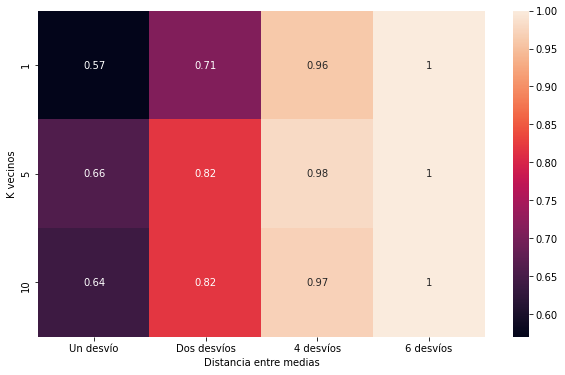

In [ ]:
sigma_A = 2
sigma_B = 2

#Dejamos fijo una media y parametrizamos la distancia a la otra en funcion del sigma
mu_A = 8
distances = [sigma_A,2*sigma_A,4*sigma_A,6*sigma_A]
Ks = [1,5,10]
results = np.zeros((len(Ks),len(distances)))
for k_idx,k in enumerate(Ks):
  for d_idx,distancia_medias in enumerate(distances):
    mu_B = mu_A + distancia_medias
    
    A = np.random.normal(mu_A,sigma_A,N)
    B = np.random.normal(mu_B,sigma_B,N)

    data = np.concatenate((A,B))
    labels = np.array(['A']*N+['B']*N)
    acc = trainDataAndTest(data,labels,proportion_train=0.5,k_neighbors=k,print_results=False)
    results[k_idx,d_idx] = acc

fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.heatmap(results,ax=ax,annot=True)
ax.set_xticklabels(['Un desvío','Dos desvíos','4 desvíos','6 desvíos'])
ax.set_yticklabels(Ks)
ax.set_ylabel('K vecinos')
ax.set_xlabel('Distancia entre medias')

Conclusión: Como es lógico, cuando las medias están a una distancia de un desvío, la clasificación es más dificil. Vemos que aquí el mejor desmepño es con 10 vecinos, pero igualmente es un desempeño de solo 0.64 de exactitud. Luego cuando las medias se separan a dos desvíos de distancia, el mejor desempeño es todavía con 10 vecinos, pero observamos que con un solo vecino se obtiene un desempeño muy similar. Finalmente, cuando las medias ya están muy alejadas (4 y 6 desvíos), la cantidad de vecinos utilizados deja de influir tanto y se obtiene un mismo desempeño alto con cualquier cantidad de vecinos, ya que la clasificación en este escenario es sencilla

AUC: 0.520
AUC: 0.790
AUC: 0.810
AUC: 0.840
AUC: 0.640
AUC: 0.810
AUC: 0.870
AUC: 0.860
AUC: 0.700
AUC: 0.850
AUC: 0.900
AUC: 0.880


Text(0.5, 33.0, 'Desvío B')

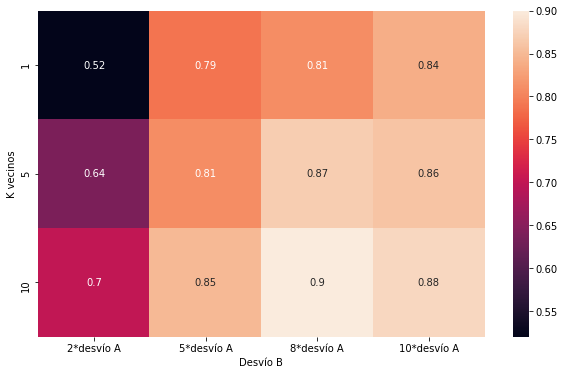

In [ ]:
#Distribuciones de la misma media
mu_A = 15
mu_B = 15


#Parametrizamos las distintas varianzas dejando una fija y expresando la otra como proporción de esta
sigma_A = 2
sigmas_B = [2*sigma_A,5*sigma_A,8*sigma_A,10*sigma_A]
Ks = [1,5,10]
results = np.zeros((len(Ks),len(distances)))
for k_idx,k in enumerate(Ks):
  for s_idx,sigma_B in enumerate(sigmas_B):
    
    A = np.random.normal(mu_A,sigma_A,N)
    B = np.random.normal(mu_B,sigma_B,N)

    data = np.concatenate((A,B))
    labels = np.array(['A']*N+['B']*N)
    acc = trainDataAndTest(data,labels,proportion_train=0.5,k_neighbors=k,print_results=False)
    results[k_idx,s_idx] = acc

fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.heatmap(results,ax=ax,annot=True)
ax.set_xticklabels(['2*desvío A','5*desvío A','8*desvío A','10*desvío A'])
ax.set_yticklabels(Ks)
ax.set_ylabel('K vecinos')
ax.set_xlabel('Desvío B')

Conclusión: Es llamativo como aún cuando las distribuciones tienen la misma media, el algoritmo es capaz de diferenciar las muestras con un 0.70 de exactitud con desvíos distanciados en 2 unidades (cantidad que representa el 13% de la media de 15 unidades). A medida que los desvíos se diferencian más, el algoritmo empieza a mejorar el desempelo. Siempre obtenemos el mejor desempeño con k=10. 

## Ejercicio 3.3 Spotify

In [156]:
import seaborn as sns

In [157]:
import pandas as pd
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


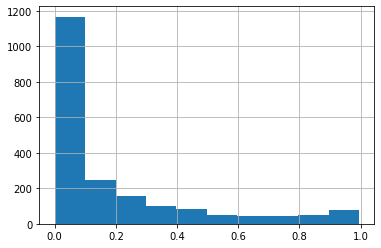

In [158]:
attributes_spotify.acousticness.hist()

In [159]:
attributes_spotify.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [160]:
attributes_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [161]:
import matplotlib.pyplot as plt
attributes_spotify.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

Graficamos algunas variables categóricas para ver la frecuencia de cada valor

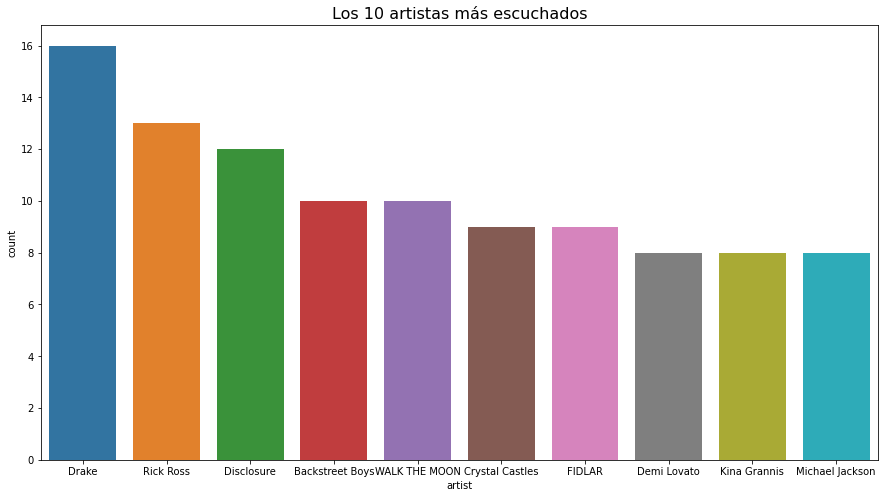

In [162]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
ax=sns.countplot(x=attributes_spotify.artist, order=pd.value_counts(attributes_spotify.artist).iloc[:10].index)
tit = ax.set_title('Los 10 artistas más escuchados',fontsize=16)

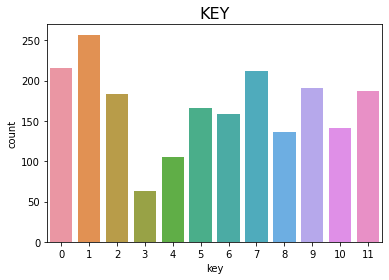

In [163]:
ax=sns.countplot(x=attributes_spotify.key)
tit  =ax.set_title('KEY',fontsize=16)

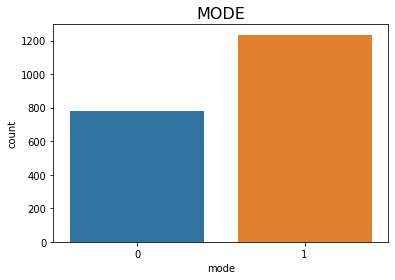

In [164]:
ax=sns.countplot(x=attributes_spotify['mode'])
tit = ax.set_title('MODE',fontsize=16)


No queda claro qué es el "mode", pero es algo binario (quizás el modo de reproducción online o offline?). Esto podría causar que todas las que le gustan las descargue, en ese caso veriamos una distirbución distinta de la variable mode en el grupo de las canciones que le gustan y las que no. Evaluamos:

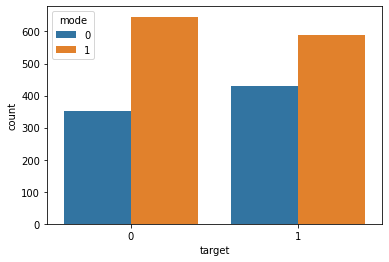

In [165]:
ax =sns.countplot(x='target',hue='mode',data=attributes_spotify)

Evidentemente no hay relación directa entre el modo y el target (si le gusta o no)

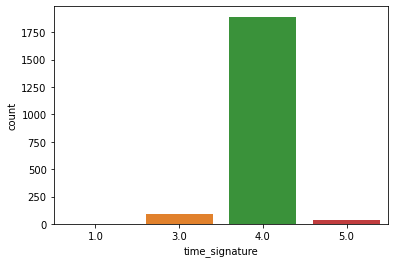

In [166]:
sns.countplot(x=attributes_spotify.time_signature)

### Evaluacion visual de features que van entre 0 y 1

Evaluamos los histogramas de las variables/features continuas, buscando analizar si tienen distribuciones visualmente distintas entre las canciones que le gustan y las que no

In [ ]:
target_0 = attributes_spotify[attributes_spotify.target==0]
target_1 = attributes_spotify[attributes_spotify.target==1]


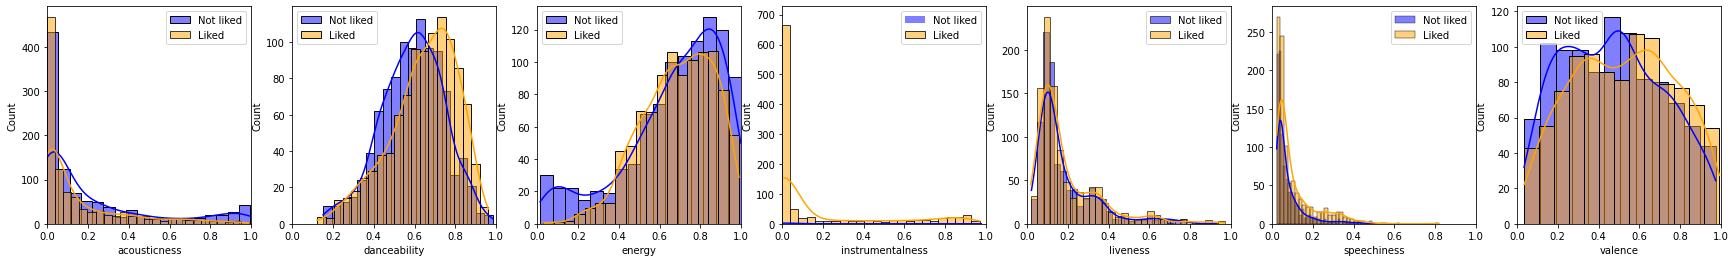

In [ ]:
features_0_1 = ['acousticness','danceability','energy','instrumentalness','liveness','speechiness','valence']
fig,axs = plt.subplots(1,len(features_0_1),figsize=(30,4))
kde_=True
for ax_,feature in zip(axs,features_0_1):
  sns.histplot(target_0[feature],kde=kde_,color='blue',ax=ax_,label='Not liked')
  sns.histplot(target_1[feature],kde=kde_,color='orange',ax=ax_,label='Liked')
  ax_.set_xlim((0,1))
  ax_.legend()

Conclusión: Se nota levemente diferencias en las distribuciones naranjas y azules. 

#### Evaluar correlaciones

Seleccionamos qué columnas del dataset usaremos como features

In [167]:
features_df = attributes_spotify[['acousticness','danceability','energy','instrumentalness','liveness','speechiness','valence',
                                  'duration_ms','key',  'loudness', 'mode','tempo','time_signature']]

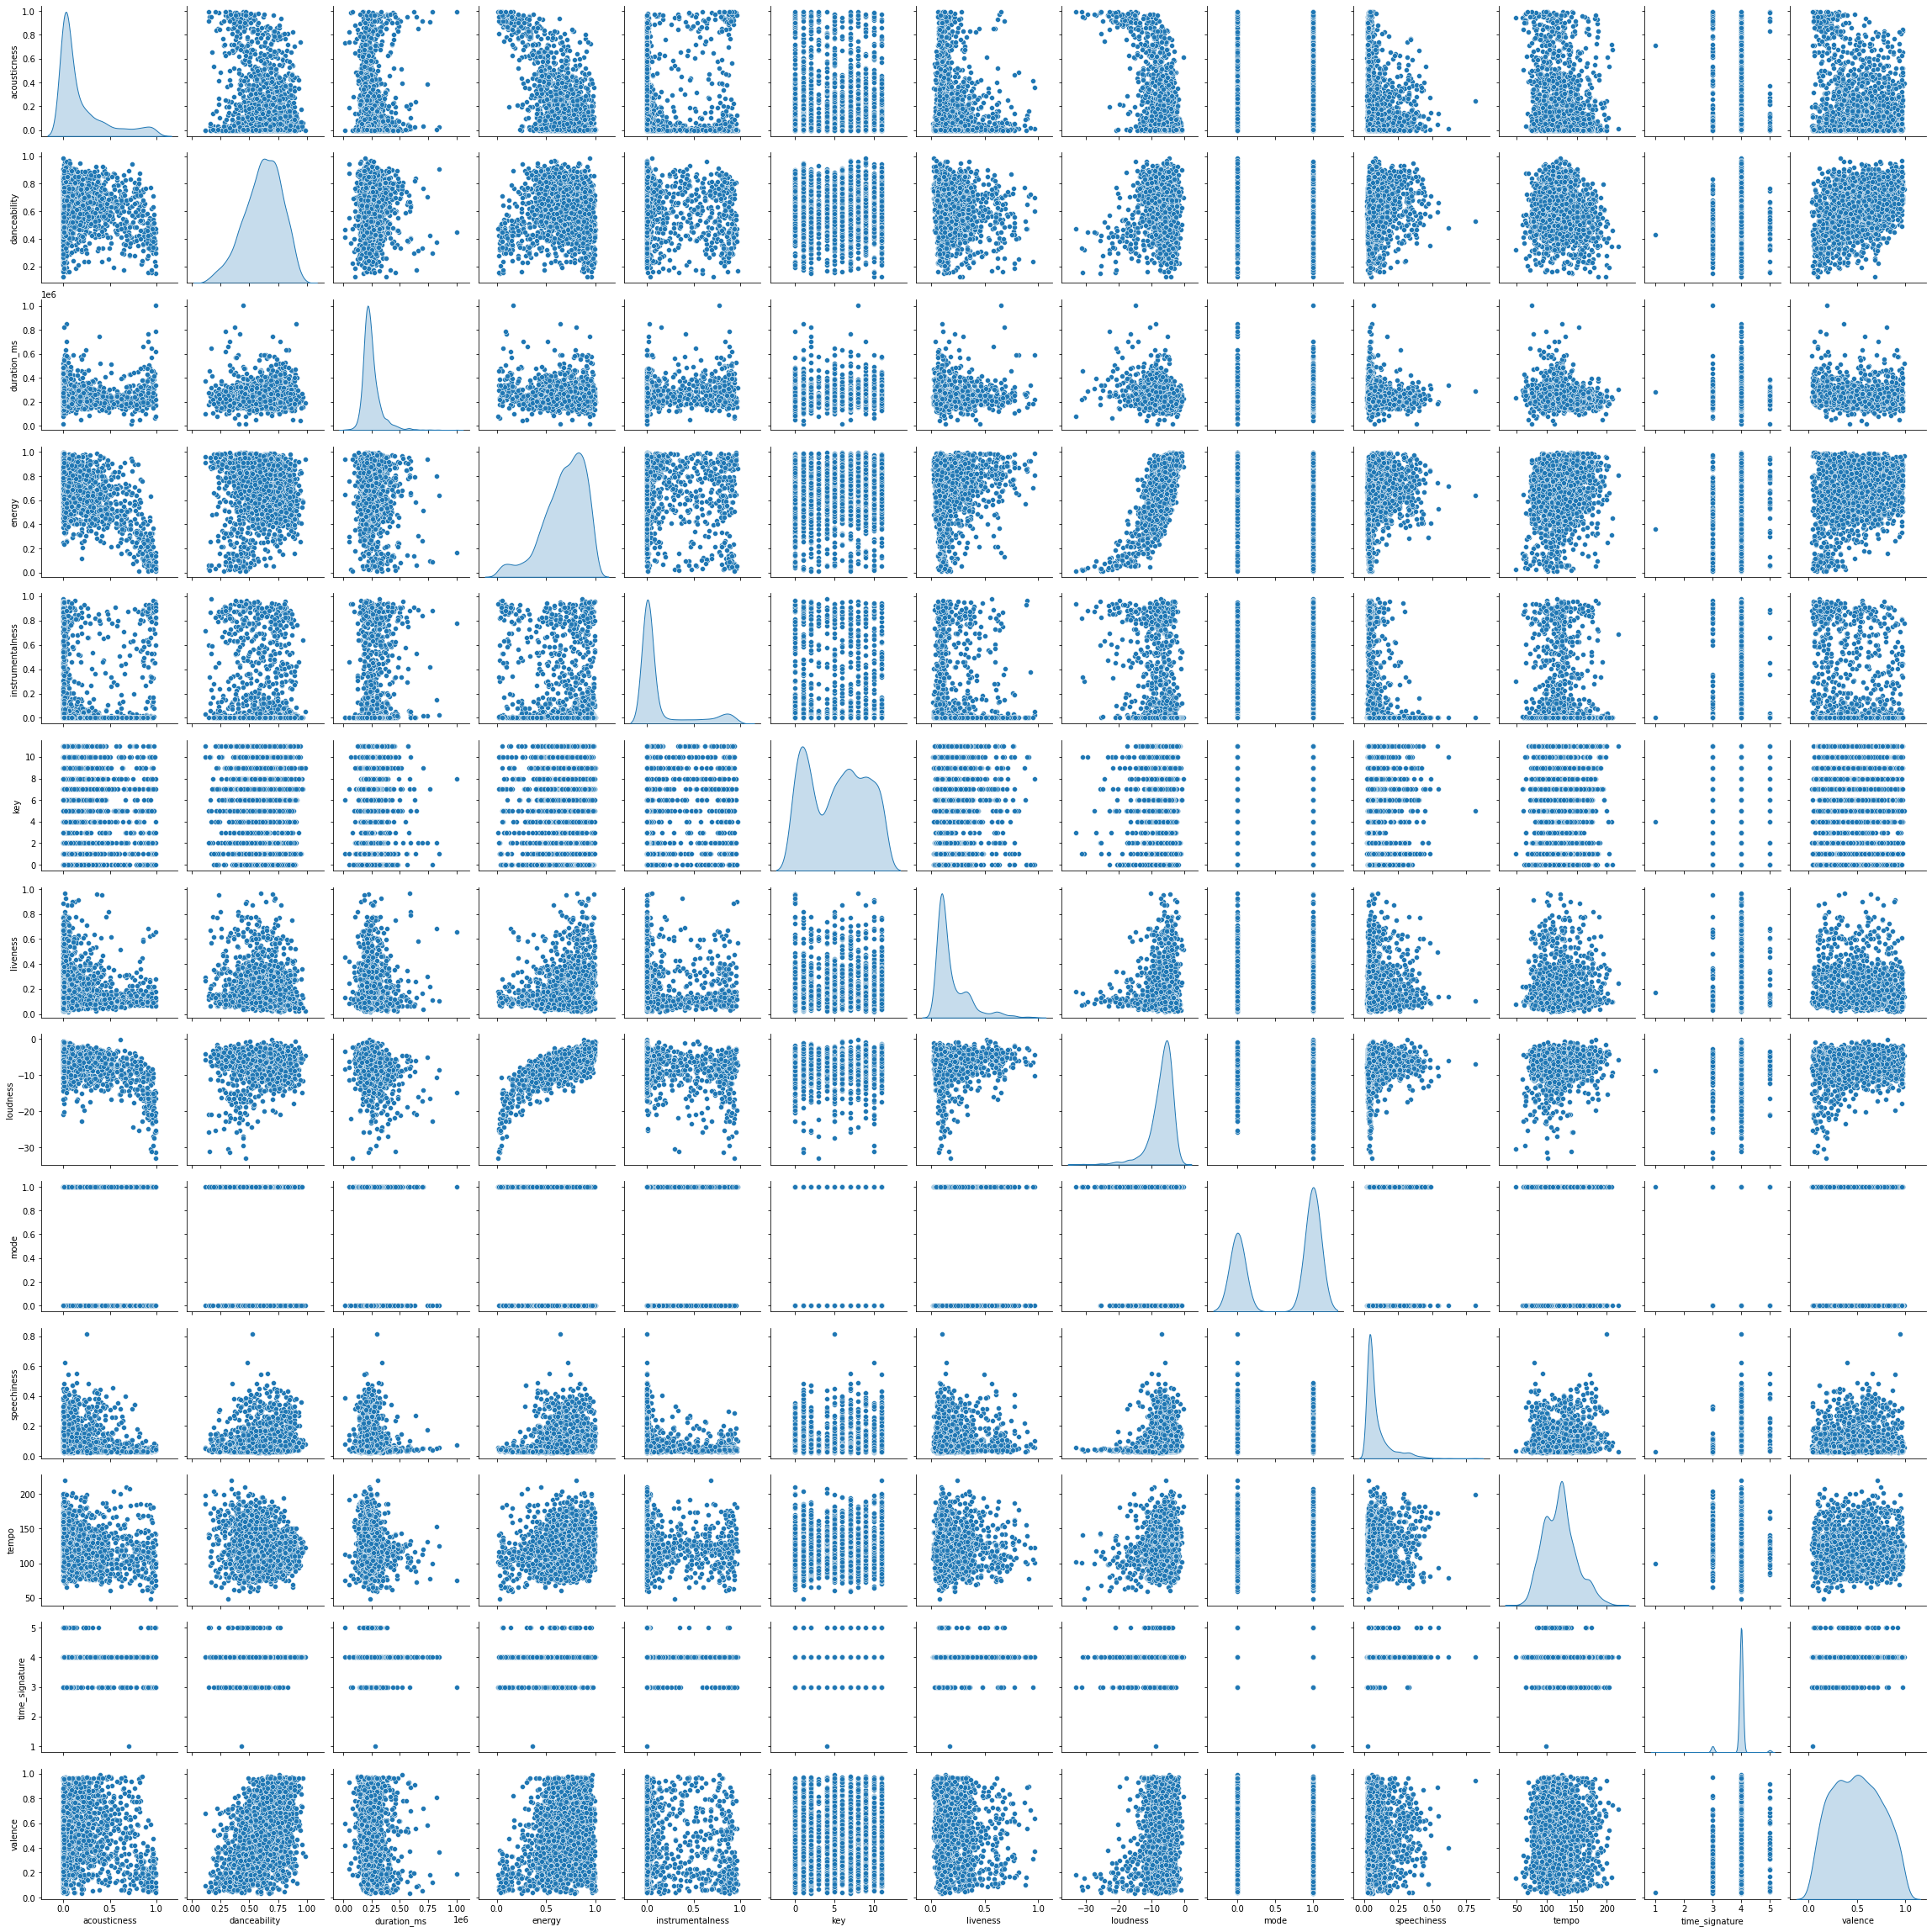

In [ ]:
sns.pairplot(features_df, diag_kind="kde")

Solo se observa cierta correlación entre energy y loudness (Esperable)

## Encontrar el mejor clasificador

Vamos a probar dos clasificadores. 

In [209]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ex = ExtraTreesClassifier(random_state=4, n_jobs=-1, max_features="auto", warm_start=True)
knn = KNeighborsClassifier(n_jobs=-1)

names = ['K-NN','Extra tree']

all_clfs=[ knn, ex] 


Para cada tipo de clasificador, definimos el conjunto de hiperparámetros que probaremos para optimizar el desempeño

In [210]:
paramsTree={"clf__criterion":["gini", "entropy"],"clf__max_depth": [5,10,20],          
         "clf__min_samples_leaf": [1,5,20], "clf__n_estimators":[100,200,2000]}


paramsKNN={"clf__n_neighbors":[3,5,10,30],'clf__weights':['uniform','distance']}


parameters_list=[ paramsKNN, paramsTree]


## Ajuste

Usaremos un esquema de validación cruzada de 4 folds para la búsqueda por grilla de hiperparámetros. Por cada posible combinación de hiperparámetros, se ajusta el modelo usando 3 folds y testeando en el otro, y esto se repite cuatro veces. Se registra el score de esa configuración como el promedio de las cuatro corridas. Al finalizar la búsqueda de todas las configuraciones, el GridSearch hará un nuevo ajuste usando todos los datos con la configuración que dio el mejor score.

Realizamos esto para cada tipo de clasificador. Además probamos el efecto de agregar como preprocesamiento un escalamiento estandar de las variables y un PCA para expresar las variables en menor dimensionalidad, ya que es muy posible que haya features redundantes 

In [218]:
X = features_df.values
Y = attributes_spotify.target.values


(1714, 13) (1714,)


In [220]:
from sklearn.decomposition import PCA
import pandas as pd
scaler = StandardScaler()

pca = PCA(n_components=10)
besties = []
for i in range(len(all_clfs)):
    print('Comenzando con ',names[i])
    clf = all_clfs[i]
    params = parameters_list[i]
    ##SIN PREPROCESAMIENTO
    pipe = Pipeline([('clf',clf)])
    grid=GridSearchCV(estimator=pipe, param_grid=parameters_list[i], n_jobs=-1, cv=4, verbose=2).fit(X,Y)
    df=pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
    print(df)
    print('Sin preprocesamiento-->BEST SCORE: {} with MODEL: {}'.format(grid.best_score_,grid.best_estimator_))
    besties.append(grid.best_estimator_)
    ##CON PREPROCESAMIENTO
    pipe = Pipeline([('scaler',scaler),('pca',pca),('clf',clf)])
    grid=GridSearchCV(estimator=pipe, param_grid=parameters_list[i],n_jobs=-1, cv=4, verbose=2).fit(X,Y)
    df = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
    print(df)
    print('Con preprocesamiento-->BEST SCORE: {} with MODEL: {}'.format(grid.best_score_,grid.best_estimator_))
    besties.append(grid.best_estimator_)



Comenzando con  K-NN
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


   clf__n_neighbors clf__weights  Accuracy
0                 3      uniform  0.559735
1                 3     distance  0.547344
2                 5      uniform  0.559752
3                 5     distance  0.549332
4                10      uniform  0.566680
5                10     distance  0.551311
6                30      uniform  0.559737
7                30     distance  0.559737
Sin preprocesamiento-->BEST SCORE: 0.5666804180418041 with MODEL: Pipeline(memory=None,
         steps=[('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=10, p=2,
                                      weights='uniform'))],
         verbose=False)
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


   clf__n_neighbors clf__weights  Accuracy
0                 3      uniform  0.646492
1                 3     distance  0.649467
2                 5      uniform  0.657893
3                 5     distance  0.661365
4                10      uniform  0.660377
5                10     distance  0.658881
6                30      uniform  0.645993
7                30     distance  0.656400
Con preprocesamiento-->BEST SCORE: 0.6613645293100738 with MODEL: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.4min finished


   clf__criterion  clf__max_depth  ...  clf__n_estimators  Accuracy
0            gini               5  ...                100  0.656388
1            gini               5  ...                200  0.656395
2            gini               5  ...               2000  0.654906
3            gini               5  ...                100  0.649443
4            gini               5  ...                200  0.650437
5            gini               5  ...               2000  0.644989
6            gini               5  ...                100  0.649946
7            gini               5  ...                200  0.651938
8            gini               5  ...               2000  0.637056
9            gini              10  ...                100  0.701005
10           gini              10  ...                200  0.702988
11           gini              10  ...               2000  0.702498
12           gini              10  ...                100  0.678685
13           gini              10  ...          

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.4min finished


   clf__criterion  clf__max_depth  ...  clf__n_estimators  Accuracy
0            gini               5  ...                100  0.615736
1            gini               5  ...                200  0.624170
2            gini               5  ...               2000  0.623673
3            gini               5  ...                100  0.617226
4            gini               5  ...                200  0.624171
5            gini               5  ...               2000  0.622678
6            gini               5  ...                100  0.610288
7            gini               5  ...                200  0.619211
8            gini               5  ...               2000  0.620696
9            gini              10  ...                100  0.635073
10           gini              10  ...                200  0.641024
11           gini              10  ...               2000  0.639043
12           gini              10  ...                100  0.632590
13           gini              10  ...          

# KNN
**Sin preprocesamiento**

*BEST CROSS VALIDATION ACCURACY: 0.567*. k=10, weights uniform

**Con preprocesamiento**

*BEST CROSS VALIDATION ACCURACY: 0.661*. k=5, weights distance


# EXTRA TREE CLASSIFIER
**Sin preprocesamiento**

*BEST CROSS VALIDATION ACCURACY: 0.723.*

HIPERPARAMETROS: criterion='gini',max_depth=20,min_samples_leaf=1,n_estimators=2000

**Con preprocesamiento**

*BEST CROSS VALIDATION ACCURACY: 0.659*

HIPERPARAMETROS: criterion='entropy', max_depth=20,min_samples_leaf=1,n_estimators=100

## Separar dataset de test

Vamos a evaluar si llegamos a la misma conclusion cuando dejamos una porcion del dataset afuera de la validación cruzada, que usaremos luego para testear la mejor configuracion reajustada con los 4 folds

In [221]:

from sklearn.model_selection import train_test_split

X_tr,x_test,y_tr,y_test = train_test_split(X,Y,stratify=Y,test_size=0.15)
print(X_tr.shape,y_tr.shape)

from sklearn.decomposition import PCA
import pandas as pd
scaler = StandardScaler()

pca = PCA(n_components=10)
besties = []
for i in range(len(all_clfs)):
    print('Comenzando con ',names[i])
    clf = all_clfs[i]
    params = parameters_list[i]
    ##SIN PREPROCESAMIENTO
    pipe = Pipeline([('clf',clf)])
    grid=GridSearchCV(estimator=pipe, param_grid=parameters_list[i], n_jobs=-1, cv=4, verbose=2).fit(X_tr,y_tr)
    df=pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
    print(df)
    print('Sin preprocesamiento-->BEST SCORE: {} with MODEL: {}'.format(grid.best_score_,grid.best_estimator_))
    besties.append(grid.best_estimator_)
    ##CON PREPROCESAMIENTO
    pipe = Pipeline([('scaler',scaler),('pca',pca),('clf',clf)])
    grid=GridSearchCV(estimator=pipe, param_grid=parameters_list[i],n_jobs=-1, cv=4, verbose=2).fit(X_tr,y_tr)
    df = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
    print(df)
    print('Con preprocesamiento-->BEST SCORE: {} with MODEL: {}'.format(grid.best_score_,grid.best_estimator_))
    besties.append(grid.best_estimator_)



(1714, 13) (1714,)
Comenzando con  K-NN
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


   clf__n_neighbors clf__weights  Accuracy
0                 3      uniform  0.561257
1                 3     distance  0.547245
2                 5      uniform  0.578731
3                 5     distance  0.557159
4                10      uniform  0.579322
5                10     distance  0.565324
6                30      uniform  0.602662
7                30     distance  0.569399
Sin preprocesamiento-->BEST SCORE: 0.6026621353724158 with MODEL: Pipeline(memory=None,
         steps=[('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=30, p=2,
                                      weights='uniform'))],
         verbose=False)
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


   clf__n_neighbors clf__weights  Accuracy
0                 3      uniform  0.672098
1                 3     distance  0.676180
2                 5      uniform  0.669775
3                 5     distance  0.675024
4                10      uniform  0.673842
5                10     distance  0.683177
6                30      uniform  0.681433
7                30     distance  0.693691
Con preprocesamiento-->BEST SCORE: 0.6936910441583339 with MODEL: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.2min finished


   clf__criterion  clf__max_depth  ...  clf__n_estimators  Accuracy
0            gini               5  ...                100  0.725179
1            gini               5  ...                200  0.725184
2            gini               5  ...               2000  0.727522
3            gini               5  ...                100  0.722857
4            gini               5  ...                200  0.724024
5            gini               5  ...               2000  0.724023
6            gini               5  ...                100  0.717012
7            gini               5  ...                200  0.713518
8            gini               5  ...               2000  0.718768
9            gini              10  ...                100  0.747929
10           gini              10  ...                200  0.748521
11           gini              10  ...               2000  0.756684
12           gini              10  ...                100  0.745019
13           gini              10  ...          

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.2min finished


   clf__criterion  clf__max_depth  ...  clf__n_estimators  Accuracy
0            gini               5  ...                100  0.671519
1            gini               5  ...                200  0.674438
2            gini               5  ...               2000  0.679695
3            gini               5  ...                100  0.675017
4            gini               5  ...                200  0.672689
5            gini               5  ...               2000  0.680860
6            gini               5  ...                100  0.675023
7            gini               5  ...                200  0.669771
8            gini               5  ...               2000  0.672686
9            gini              10  ...                100  0.685511
10           gini              10  ...                200  0.685524
11           gini              10  ...               2000  0.689616
12           gini              10  ...                100  0.683765
13           gini              10  ...          

# KNN
**Sin preprocesamiento**

*BEST CROSS VALIDATION ACCURACY: 0.603*. k=30, weights uniform

**Con preprocesamiento**

*BEST CROSS VALIDATION ACCURACY: 0.694*. k=30, weights distance


# EXTRA TREE CLASSIFIER
**Sin preprocesamiento**

*BEST CROSS VALIDATION ACCURACY: 0.774.*

HIPERPARAMETROS: criterion='entropy',max_depth=20,min_samples_leaf=1,n_estimators=2000

**Con preprocesamiento**

*BEST CROSS VALIDATION ACCURACY: 0.712*

HIPERPARAMETROS: criterion='entropy', max_depth=20,min_samples_leaf=1,n_estimators=2000

Vamos a  el pipeline con mejor accuracy en todo el dataset. Esto 

In [225]:
len(besties)

4

In [224]:
best = besties[2]

test_preds = best.predict(x_test)

fpr,tpr,th = roc_curve(y_test,test_preds)
print('AUC: {:.3f}'.format(roc_auc_score(y_test,test_preds)))

tn, fp, fn, tp = confusion_matrix(y_test,test_preds).ravel()

sens = tp/(tp+fn)
spec = tn/(tn+fp)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
acc = (tp+tn)/(tn+fp+fn+tp)
print(f'True negatives:{tn}\nTrue positives:{tp}\nFalse negatives:{fn}\nFalse positives:{fp}')
print(f'\nSensitivity(recall):{sens:.2f}\nSpecificity:{spec:.2f}')
print(f'PPV(precision):{ppv:.2f}\nNPV:{npv:.2f}\n')

print('f1-score:{:.3f}'.format(2*ppv*sens/(ppv+sens)))
print('accuracy:{:.3f}'.format(acc))

AUC: 0.819
True negatives:134
True positives:114
False negatives:39
False positives:16

Sensitivity(recall):0.75
Specificity:0.89
PPV(precision):0.88
NPV:0.77

f1-score:0.806
accuracy:0.818


In [236]:
names = ['acousticness','danceability','energy','instrumentalness','liveness','speechiness','valence',
                                  'duration_ms','key',  'loudness', 'mode','tempo','time_signature']
importances = dict(zip(names,best['clf'].feature_importances_))
df = pd.DataFrame(columns=names)
df = df.append(importances,ignore_index=True).sort_values(0,axis=1)
df

,time_signature,mode,key,liveness,tempo,valence,acousticness,duration_ms,energy,speechiness,danceability,loudness,instrumentalness
0,0.019314,0.023113,0.059384,0.06707,0.076728,0.080386,0.084677,0.086913,0.089343,0.091618,0.092125,0.108591,0.120738


Conclusión: alcanzamos un clasificador que obtuvo un área bajo curva ROC de 0.82 en 303 muestras de testeo no utilizadas durante la optimización del algoritmo. El clasificador es un ensamble de árboles de decisión conocido como Extra-Tree classifier. La exactitud en la clasificación de canciones que le gustan y que no le gustan se midió como validación cruzada y el promedio fue de 0.77 a lo largo de los 4 folds. En test la exactitud fue de 0.82, con un buen f1 score de 0.81. 

La variable con mayor peso en la decisión del algoritmo es "instrumentalness", y le sigue "loudness".

El algoritmo con PCA de 10 componentes como preprocesamiento tuvo un peor desempeño, sugiriendo que las 13 variables tienen relevancia para la clasificación. 
